# External Compton


![EC scheme](../../images/jetset_EC_scheme.png)


### Broad Line Region


In [1]:
import jetset
print('tested on jetset',jetset.__version__)

tested on jetset 1.3.0rc8


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from jetset.jet_model import Jet
my_jet=Jet(name='EC_example',electron_distribution='bkn',beaming_expr='bulk_theta')
my_jet.add_EC_component(['EC_BLR','EC_Disk'],disk_type='BB')


===> setting C threads to 12


The `show_model` method provides, among other information, information concerning the accretion disk, in this case we use a mono temperature black body `BB`  

In [4]:
my_jet.show_model()


--------------------------------------------------------------------------------
model description: 
--------------------------------------------------------------------------------
type: Jet
name: EC_example  
geometry: spherical  

electrons distribution:
 type: bkn  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization:  True
 log-values:  False
 ratio of cold protons to relativistic electrons: 1.000000e+00

accretion disk:
 disk Type: BB
 L disk: 1.000000e+45 (erg/s)
 T disk: 1.000000e+05 (K)
 nu peak disk: 8.171810e+15 (Hz)
radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sum, hidden: False
   name:Sync, state: self-abs
   name:Sync, hidden: False
   name:SSC, state: on
   name:SSC, hidden: False
   name:EC_BLR, state: on
   name:EC_BLR, hidden: False
   name:Disk, state: on
   name:Disk, hidden: False
   name

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
EC_example,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
EC_example,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
EC_example,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
EC_example,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
EC_example,theta,jet-viewing-angle,deg,1.000000e-01,0.000000e+00,9.000000e+01,False,False
EC_example,BulkFactor,jet-bulk-factor,lorentz-factor*,1.000000e+01,1.000000e+00,1.000000e+05,False,False
EC_example,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
EC_example,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
EC_example,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
EC_example,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False


--------------------------------------------------------------------------------


### change Disk type

the disk type can be set as a more realistic multi temperature black body (MultiBB).  In this case the `show_model` method provides physical parameters regarding the  multi temperature black body accretion disk: 

- the Schwarzschild (Sw radius)

- the Eddington luminosity (L Edd.)

- the accretion rate (accr_rate)

- the Eddington accretion rate (accr_rate Edd.)

In [5]:
my_jet.add_EC_component(['EC_BLR','EC_Disk'],disk_type='MultiBB')
my_jet.set_par('L_Disk',val=1E46)
my_jet.set_par('gmax',val=5E4)
my_jet.set_par('gmin',val=2.)
my_jet.set_par('R_H',val=1E17)

my_jet.set_par('p',val=1.5)
my_jet.set_par('p_1',val=3.2)
my_jet.set_par('R',val=1E16)
my_jet.set_par('B',val=1.5)
my_jet.set_par('z_cosm',val=0.6)
my_jet.set_par('BulkFactor',val=20)
my_jet.set_par('theta',val=1)
my_jet.set_par('gamma_break',val=5E2)
my_jet.set_N_from_nuLnu(nu_src=3E13,nuLnu_src=5E45)
my_jet.set_IC_nu_size(100)
my_jet.show_model()


--------------------------------------------------------------------------------
model description: 
--------------------------------------------------------------------------------
type: Jet
name: EC_example  
geometry: spherical  

electrons distribution:
 type: bkn  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 5.000000e+04
 normalization:  True
 log-values:  False
 ratio of cold protons to relativistic electrons: 1.000000e+00

accretion disk:
 disk Type: MultiBB
 L disk: 1.000000e+46 (erg/s)
 T disk: 5.015768e+04 (K)
 nu peak disk: 4.098790e+15 (Hz)
 Sw radius 2.953539e+14 (cm)
 L Edd. 1.300000e+47 (erg/s)
 accr_rate: 2.205171e+00 (M_sun/yr)
 accr_rate Edd.: 2.866722e+01 (M_sun/yr)
radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sum, hidden: False
   name:Sync, state: self-abs
   name:Sync, hidden: False
   name:SSC, state: on
  

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
EC_example,R,region_size,cm,1.000000e+16,1.000000e+03,1.000000e+30,False,False
EC_example,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
EC_example,B,magnetic_field,gauss,1.500000e+00,0.000000e+00,--,False,False
EC_example,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
EC_example,theta,jet-viewing-angle,deg,1.000000e+00,0.000000e+00,9.000000e+01,False,False
EC_example,BulkFactor,jet-bulk-factor,lorentz-factor*,2.000000e+01,1.000000e+00,1.000000e+05,False,False
EC_example,z_cosm,redshift,,6.000000e-01,0.000000e+00,--,False,False
EC_example,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
EC_example,gmax,high-energy-cut-off,lorentz-factor*,5.000000e+04,1.000000e+00,1.000000e+15,False,False
EC_example,N,emitters_density,1 / cm3,1.126221e+02,0.000000e+00,--,False,False


--------------------------------------------------------------------------------


now we set some parameter for the model

In [6]:
my_jet.eval()


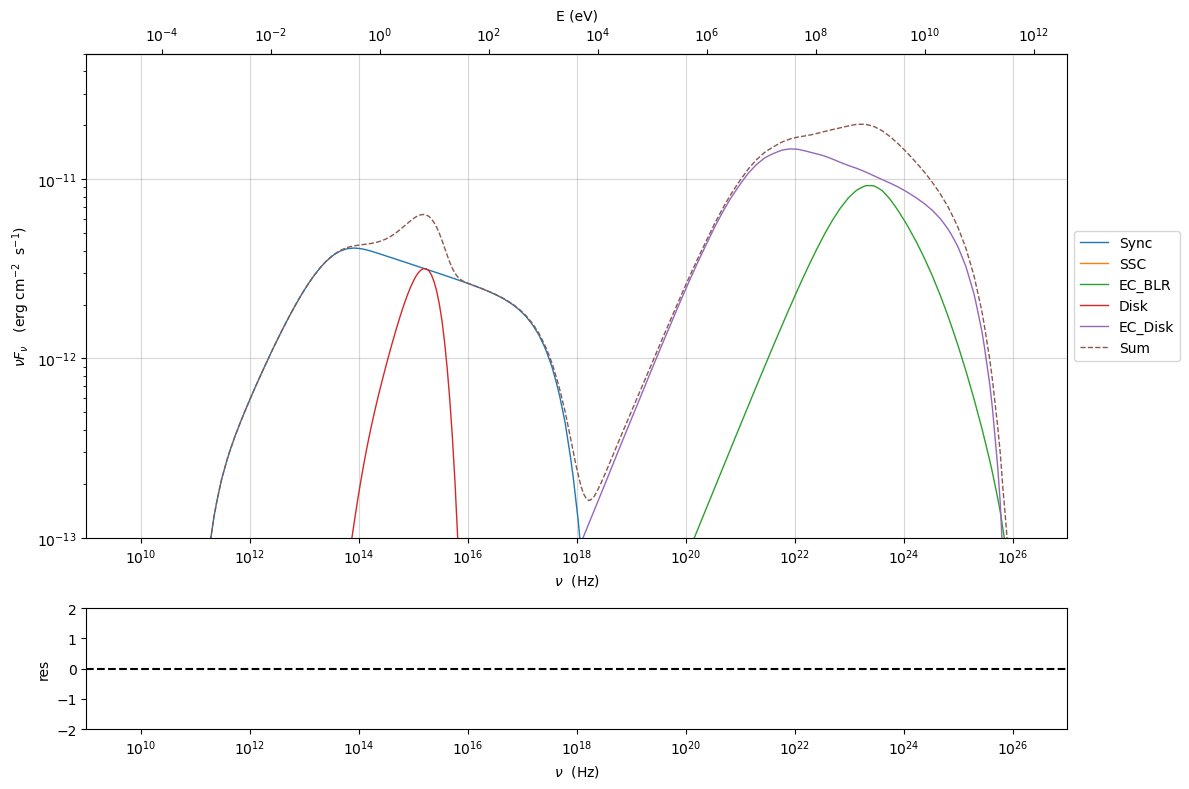

In [7]:
p=my_jet.plot_model(frame='obs')
p.setlim(y_min=1E-13,y_max=5E-11,x_min=1E9,x_max=1E27)

### Dusty Torus

In [8]:
my_jet.add_EC_component('DT')
my_jet.show_model()


--------------------------------------------------------------------------------
model description: 
--------------------------------------------------------------------------------
type: Jet
name: EC_example  
geometry: spherical  

electrons distribution:
 type: bkn  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 5.000000e+04
 normalization:  True
 log-values:  False
 ratio of cold protons to relativistic electrons: 1.000000e+00

accretion disk:
 disk Type: MultiBB
 L disk: 1.000000e+46 (erg/s)
 T disk: 5.015768e+04 (K)
 nu peak disk: 4.098790e+15 (Hz)
 Sw radius 2.953539e+14 (cm)
 L Edd. 1.300000e+47 (erg/s)
 accr_rate: 2.205171e+00 (M_sun/yr)
 accr_rate Edd.: 2.866722e+01 (M_sun/yr)
radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sum, hidden: False
   name:Sync, state: self-abs
   name:Sync, hidden: False
   name:SSC, state: on
  

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
EC_example,R,region_size,cm,1.000000e+16,1.000000e+03,1.000000e+30,False,False
EC_example,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
EC_example,B,magnetic_field,gauss,1.500000e+00,0.000000e+00,--,False,False
EC_example,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
EC_example,theta,jet-viewing-angle,deg,1.000000e+00,0.000000e+00,9.000000e+01,False,False
EC_example,BulkFactor,jet-bulk-factor,lorentz-factor*,2.000000e+01,1.000000e+00,1.000000e+05,False,False
EC_example,z_cosm,redshift,,6.000000e-01,0.000000e+00,--,False,False
EC_example,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
EC_example,gmax,high-energy-cut-off,lorentz-factor*,5.000000e+04,1.000000e+00,1.000000e+15,False,False
EC_example,N,emitters_density,1 / cm3,1.126221e+02,0.000000e+00,--,False,False


--------------------------------------------------------------------------------


In [9]:
my_jet.eval()


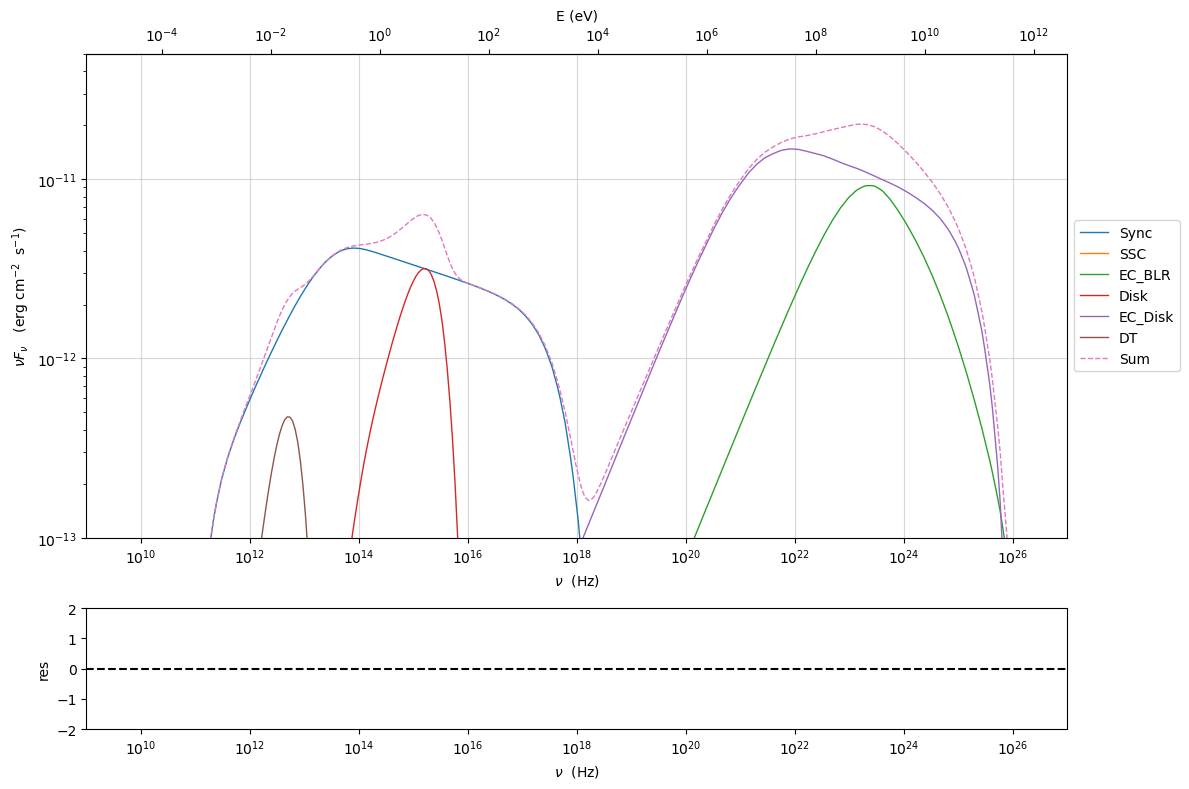

In [10]:
p=my_jet.plot_model()
p.setlim(y_min=1E-13,y_max=5E-11,x_min=1E9,x_max=1E27)

In [11]:
my_jet.save_model('test_EC_model.pkl')


In [12]:

my_jet=Jet.load_model('test_EC_model.pkl')


===> setting C threads to 12


In [13]:
my_jet.eval()

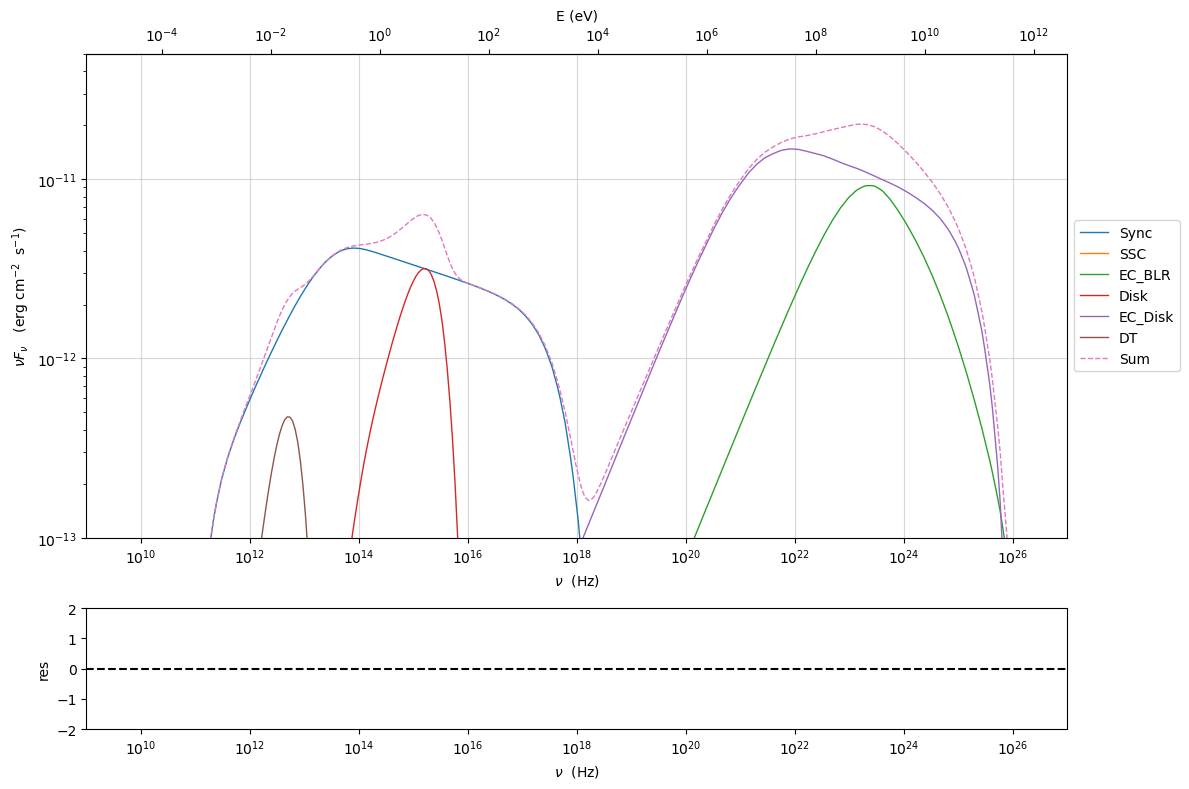

In [14]:

p=my_jet.plot_model(frame='obs')
p.setlim(y_min=1E-13,y_max=5E-11,x_min=1E9,x_max=1E27)

### setting the BLR and DT radius as a function of the disk luminosity

In [15]:
#kaspi+ 2007:https://iopscience.iop.org/article/10.1086/512094/pdf
my_jet.make_dependent_par(par='R_BLR_in', depends_on=['L_Disk'], par_expr='1E17*(L_Disk/1E46)**0.5')

my_jet.make_dependent_par(par='R_BLR_out', depends_on=['R_BLR_in'], par_expr='R_BLR_in*1.1')

#Cleary+ 2007:https://iopscience.iop.org/article/10.1086/511969/pdf
my_jet.make_dependent_par(par='R_DT', depends_on=['L_Disk'], par_expr='2E19*(L_Disk/1E46)**0.5')


adding par: L_Disk to  R_BLR_in
==> par R_BLR_in is depending on ['L_Disk'] according to expr:   R_BLR_in =
1E17*(L_Disk/1E46)**0.5
adding par: R_BLR_in to  R_BLR_out
==> par R_BLR_out is depending on ['R_BLR_in'] according to expr:   R_BLR_out =
R_BLR_in*1.1
adding par: L_Disk to  R_DT
==> par R_DT is depending on ['L_Disk'] according to expr:   R_DT =
2E19*(L_Disk/1E46)**0.5


In [16]:
my_jet.parameters.L_Disk.val=5E45

In [17]:
my_jet.parameters

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
EC_example,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
EC_example,gmax,high-energy-cut-off,lorentz-factor*,5.000000e+04,1.000000e+00,1.000000e+15,False,False
EC_example,N,emitters_density,1 / cm3,1.126221e+02,0.000000e+00,--,False,False
EC_example,gamma_break,turn-over-energy,lorentz-factor*,5.000000e+02,1.000000e+00,1.000000e+09,False,False
EC_example,p,LE_spectral_slope,,1.500000e+00,-1.000000e+01,1.000000e+01,False,False
EC_example,p_1,HE_spectral_slope,,3.200000e+00,-1.000000e+01,1.000000e+01,False,False
EC_example,tau_BLR,BLR,,1.000000e-01,0.000000e+00,1.000000e+00,False,False
EC_example,"*R_BLR_in(D,L_Disk)",BLR,cm,7.071068e+16,0.000000e+00,--,False,True
EC_example,"*R_BLR_out(D,R_BLR_in)",BLR,cm,7.778175e+16,0.000000e+00,--,False,True
EC_example,R_inner_Sw,Disk,Sw. radii*,3.000000e+00,0.000000e+00,--,False,False


None

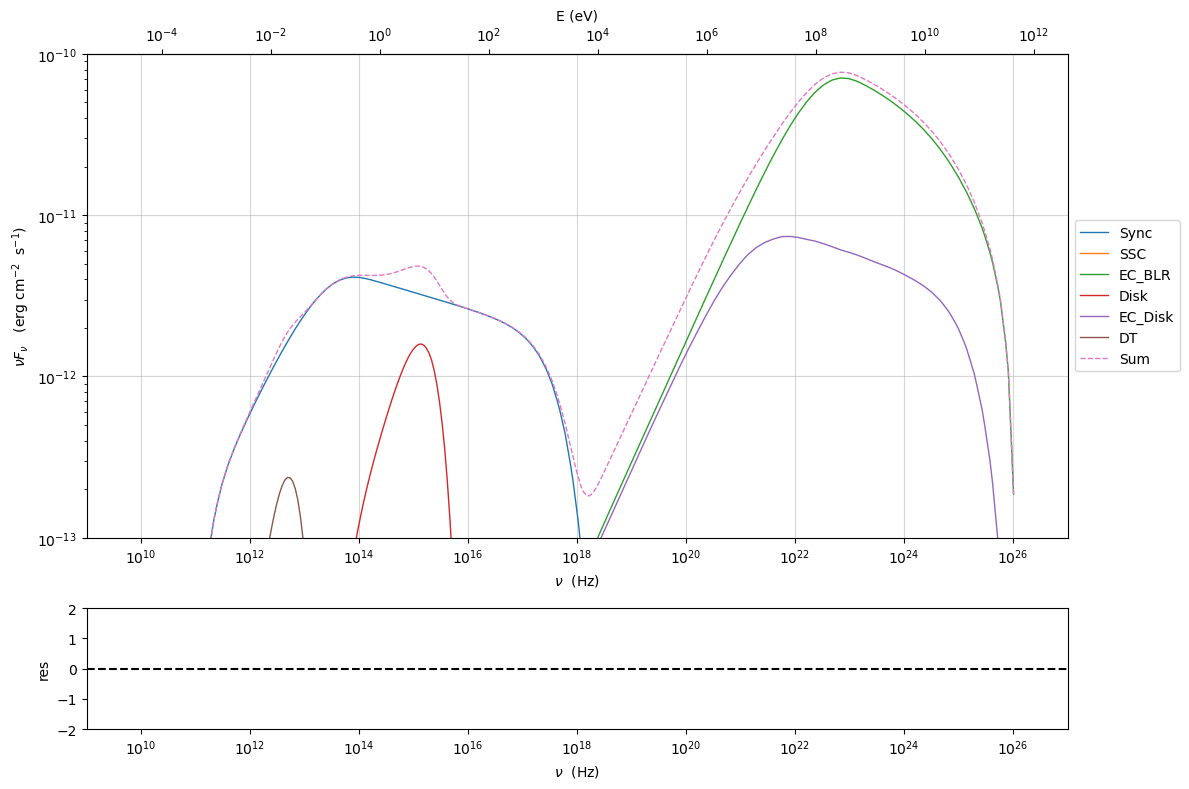

In [18]:
my_jet.eval()
p=my_jet.plot_model()
p.setlim(y_min=1E-13,y_max=1E-10,x_min=1E9,x_max=1E27)

In [19]:
my_jet.make_conical_jet(theta_open=5,R=1E16)

adding par: R_H to  R
adding par: theta_open to  R
==> par R is depending on ['R_H', 'theta_open'] according to expr:   R =
np.tan(np.radians(theta_open))*R_H
setting R_H to 1.1430052302761344e+17


In [22]:
my_jet.parameters

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
EC_example,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
EC_example,gmax,high-energy-cut-off,lorentz-factor*,5.000000e+04,1.000000e+00,1.000000e+15,False,False
EC_example,N,emitters_density,1 / cm3,1.126221e+02,0.000000e+00,--,False,False
EC_example,gamma_break,turn-over-energy,lorentz-factor*,5.000000e+02,1.000000e+00,1.000000e+09,False,False
EC_example,p,LE_spectral_slope,,1.500000e+00,-1.000000e+01,1.000000e+01,False,False
EC_example,p_1,HE_spectral_slope,,3.200000e+00,-1.000000e+01,1.000000e+01,False,False
EC_example,tau_BLR,BLR,,1.000000e-01,0.000000e+00,1.000000e+00,False,False
EC_example,"*R_BLR_in(D,L_Disk)",BLR,cm,7.071068e+16,0.000000e+00,--,False,True
EC_example,"*R_BLR_out(D,R_BLR_in)",BLR,cm,7.778175e+16,0.000000e+00,--,False,True
EC_example,R_inner_Sw,Disk,Sw. radii*,3.000000e+00,0.000000e+00,--,False,False


None

In [20]:
my_jet.set_EC_dependencies()

==> par R_BLR_in is depending on ['L_Disk'] according to expr:   R_BLR_in =
3E17*(L_Disk/1E46)**0.5
==> par R_BLR_out is depending on ['R_BLR_in'] according to expr:   R_BLR_out =
R_BLR_in*1.1
==> par R_DT is depending on ['L_Disk'] according to expr:   R_DT =
2E19*(L_Disk/1E46)**0.5


In [21]:
my_jet.parameters

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
EC_example,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
EC_example,gmax,high-energy-cut-off,lorentz-factor*,5.000000e+04,1.000000e+00,1.000000e+15,False,False
EC_example,N,emitters_density,1 / cm3,1.126221e+02,0.000000e+00,--,False,False
EC_example,gamma_break,turn-over-energy,lorentz-factor*,5.000000e+02,1.000000e+00,1.000000e+09,False,False
EC_example,p,LE_spectral_slope,,1.500000e+00,-1.000000e+01,1.000000e+01,False,False
EC_example,p_1,HE_spectral_slope,,3.200000e+00,-1.000000e+01,1.000000e+01,False,False
EC_example,tau_BLR,BLR,,1.000000e-01,0.000000e+00,1.000000e+00,False,False
EC_example,"*R_BLR_in(D,L_Disk)",BLR,cm,7.071068e+16,0.000000e+00,--,False,True
EC_example,"*R_BLR_out(D,R_BLR_in)",BLR,cm,7.778175e+16,0.000000e+00,--,False,True
EC_example,R_inner_Sw,Disk,Sw. radii*,3.000000e+00,0.000000e+00,--,False,False


None

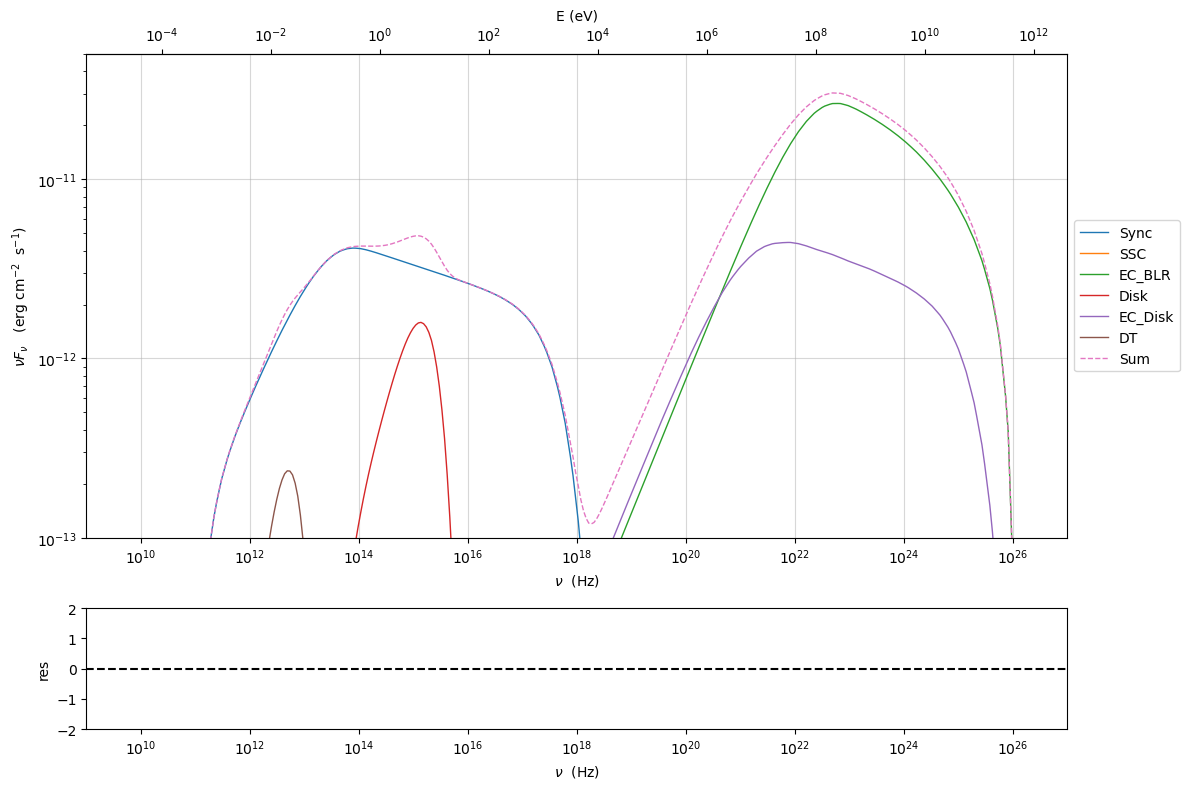

In [22]:
my_jet.eval()
p=my_jet.plot_model()
p.setlim(y_min=1E-13,y_max=5E-11,x_min=1E9,x_max=1E27)

### Changing the external field transformation

Default method, is the transformation of the external photon field from the disk/BH frame to the relativistic blob

In [23]:
my_jet.set_external_field_transf('blob')

Alternatively, in the case of istropric fields as the CMB or the BLR and DT within the BLR radius, and DT radius, respectively, it is possible to transform the the electron distribution, moving the blob to the disk/BH frame.

In [24]:
my_jet.set_external_field_transf('disk')

### External photon field energy density along the jet

In [25]:
def iso_field_transf(L,R,BulckFactor):
    beta=1.0 - 1/(BulckFactor*BulckFactor)
    return L/(4*np.pi*R*R*3E10)*BulckFactor*BulckFactor*(1+((beta**2)/3))

def external_iso_behind_transf(L,R,BulckFactor):
    beta=1.0 - 1/(BulckFactor*BulckFactor)
    return L/((4*np.pi*R*R*3E10)*(BulckFactor*BulckFactor*(1+beta)**2))


EC seed photon fields, in the Disk  rest frame

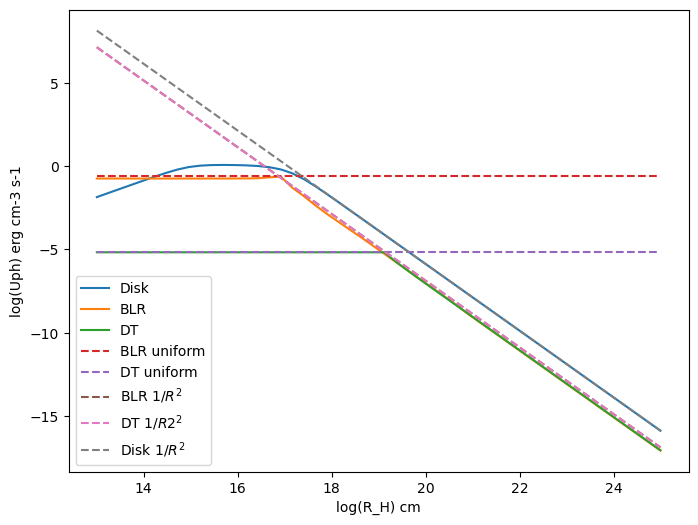

In [26]:
%matplotlib inline
my_jet.add_EC_component(disk_type='BB')
fig = plt.figure(figsize=(8,6))
ax=fig.subplots(1)
N=50
G=1
R_range=np.logspace(13,25,N)
y=np.zeros((8,N))
my_jet.set_verbosity(0)

for ID,R in enumerate(R_range):
    my_jet.set_par('R_H',val=R)
    my_jet.set_external_fields()
    my_jet.energetic_report(verbose=False)
    
    y[1,ID]=my_jet.energetic_dict['U_BLR_DRF']
    y[0,ID]=my_jet.energetic_dict['U_Disk_DRF']
    y[2,ID]=my_jet.energetic_dict['U_DT_DRF']
    
y[4,:]=iso_field_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_DT.val,my_jet.parameters.R_DT.val,G)
y[3,:]=iso_field_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_BLR.val,my_jet.parameters.R_BLR_in.val,G)
y[5,:]=external_iso_behind_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_BLR.val,R_range,G)
y[6,:]=external_iso_behind_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_DT.val,R_range,G)
y[7,:]=external_iso_behind_transf(my_jet._blob.L_Disk_radiative,R_range,G)

ax.plot(np.log10(R_range),np.log10(y[0,:]),label=r'Disk')
ax.plot(np.log10(R_range),np.log10(y[1,:]),'-',label=r'BLR')
ax.plot(np.log10(R_range),np.log10(y[2,:]),label=r'DT')
ax.plot(np.log10(R_range),np.log10(y[3,:]),'--',label=r'BLR uniform')
ax.plot(np.log10(R_range),np.log10(y[4,:]),'--',label=r'DT uniform')
ax.plot(np.log10(R_range),np.log10(y[5,:]),'--',label=r'BLR 1/$R^2$')
ax.plot(np.log10(R_range),np.log10(y[6,:]),'--',label=r'DT 1/$R2^2$')
ax.plot(np.log10(R_range),np.log10(y[7,:]),'--',label=r'Disk 1/$R^2$')
ax.set_xlabel('log(R_H) cm')
ax.set_ylabel('log(Uph) erg cm-3 s-1')

ax.legend()


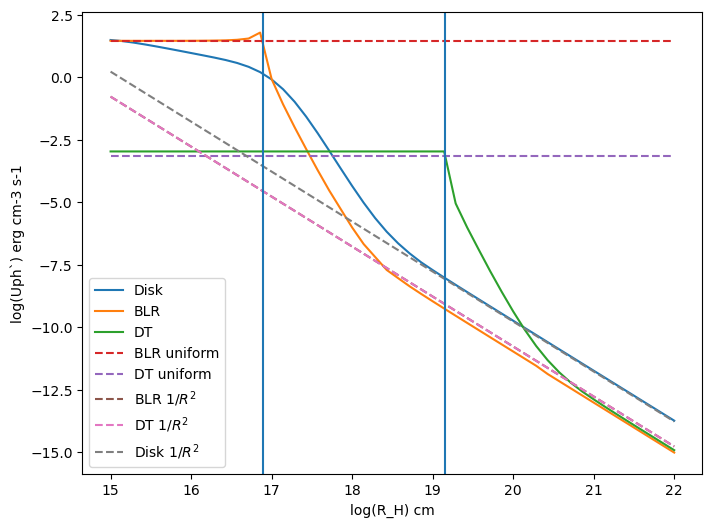

In [27]:
%matplotlib inline

fig = plt.figure(figsize=(8,6))
ax=fig.subplots(1)

L_Disk=1E45
N=50
G=my_jet.parameters.BulkFactor.val
R_range=np.logspace(15,22,N)
y=np.zeros((8,N))
my_jet.set_par('L_Disk',val=L_Disk)
my_jet._blob.theta_n_int=100
my_jet._blob.l_n_int=100
my_jet._blob.theta_n_int=100
my_jet._blob.l_n_int=100
for ID,R in enumerate(R_range):
    my_jet.set_par('R_H',val=R)
    
    my_jet.eval()
    my_jet.energetic_report(verbose=False)
    
    y[1,ID]=my_jet.energetic_dict['U_BLR']
    y[0,ID]=my_jet.energetic_dict['U_Disk']
    y[2,ID]=my_jet.energetic_dict['U_DT']
    


y[4,:]=iso_field_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_DT.val,my_jet.parameters.R_DT.val,G)
y[3,:]=iso_field_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_BLR.val,my_jet.parameters.R_BLR_in.val,G)
y[5,:]=external_iso_behind_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_BLR.val,R_range,G)
y[6,:]=external_iso_behind_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_DT.val,R_range,G)
y[7,:]=external_iso_behind_transf(my_jet._blob.L_Disk_radiative,R_range,G)

ax.plot(np.log10(R_range),np.log10(y[0,:]),label=r'Disk')
ax.plot(np.log10(R_range),np.log10(y[1,:]),'-',label=r'BLR')
ax.plot(np.log10(R_range),np.log10(y[2,:]),'-',label=r'DT')
ax.plot(np.log10(R_range),np.log10(y[3,:]),'--',label=r'BLR uniform')
ax.plot(np.log10(R_range),np.log10(y[4,:]),'--',label=r'DT uniform')
ax.plot(np.log10(R_range),np.log10(y[5,:]),'--',label=r'BLR 1/$R^2$')
ax.plot(np.log10(R_range),np.log10(y[6,:]),'--',label=r'DT 1/$R^2$')
ax.plot(np.log10(R_range),np.log10(y[7,:]),'--',label=r'Disk 1/$R^2$')
ax.axvline(np.log10( my_jet.parameters.R_DT.val ))
ax.axvline(np.log10( my_jet.parameters.R_BLR_out.val))

ax.set_xlabel('log(R_H) cm')
ax.set_ylabel('log(Uph`) erg cm-3 s-1')

ax.legend()


### IC against the CMB

In [28]:
my_jet=Jet(name='test_equipartition',electron_distribution='lppl',beaming_expr='bulk_theta')
my_jet.set_par('R',val=1E21)
my_jet.set_par('z_cosm',val= 0.651)
my_jet.set_par('B',val=2E-5)
my_jet.set_par('gmin',val=50)
my_jet.set_par('gamma0_log_parab',val=35.0E3)
my_jet.set_par('gmax',val=30E5)
my_jet.set_par('theta',val=12.0)
my_jet.set_par('BulkFactor',val=3.5)
my_jet.set_par('s',val=2.58)
my_jet.set_par('r',val=0.42)
my_jet.set_N_from_nuFnu(5E-15,1E12)
my_jet.add_EC_component('EC_CMB')

===> setting C threads to 12


We can now compare the different beaming pattern for the EC emission if the CMB, and realize that the beaming pattern is different. 
This is very important in the case of radio galaxies. The `src` transformation is the one to use in the case of radio galaxies or 
misaligned AGNs in general, and  gives a more accurate results for the beaming patter of an isotropic external field.

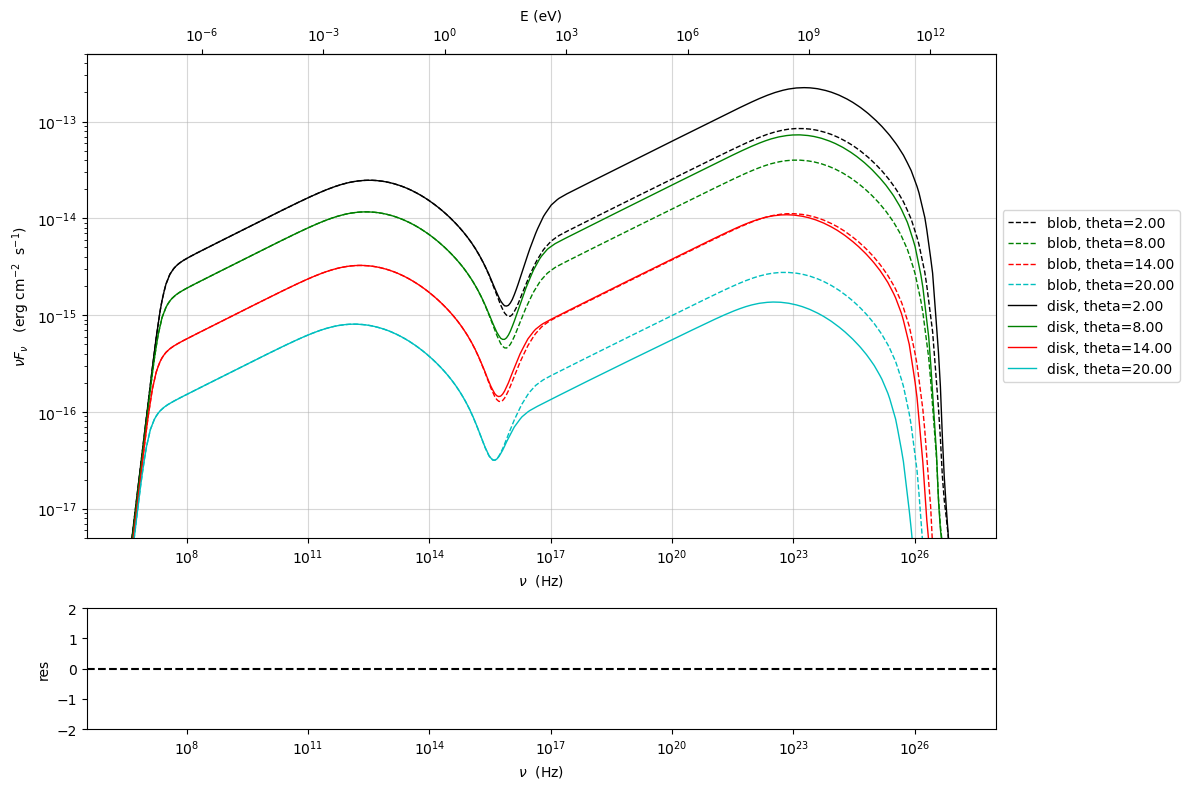

In [29]:
from jetset.plot_sedfit import PlotSED
p=PlotSED()

my_jet.set_external_field_transf('blob')
c= ['k', 'g', 'r', 'c'] 
for ID,theta in enumerate(np.linspace(2,20,4)):
    my_jet.parameters.theta.val=theta
    my_jet.eval()
    my_jet.plot_model(plot_obj=p,comp='Sum',label='blob, theta=%2.2f'%theta,line_style='--',color=c[ID])

my_jet.set_external_field_transf('disk')
for ID,theta in enumerate(np.linspace(2,20,4)):
    my_jet.parameters.theta.val=theta
    my_jet.eval()
    my_jet.plot_model(plot_obj=p,comp='Sum',label='disk, theta=%2.2f'%theta,line_style='',color=c[ID])

p.setlim(y_min=5E-18,y_max=5E-13,x_max=1E28)

## Equipartition

It is also possible to set our jet at the equipartition, that is achieved not using analytical approximation, but by numerically finding the equipartition value over a grid.
We have to provide the value of the observed flux (`nuFnu_obs`) at a given observed frequency (`nu_obs`), the minimum value of B (`B_min`), and the number of grid points (`N_pts`)


B grid min  1e-09
B grid max  1.0
grid points 50


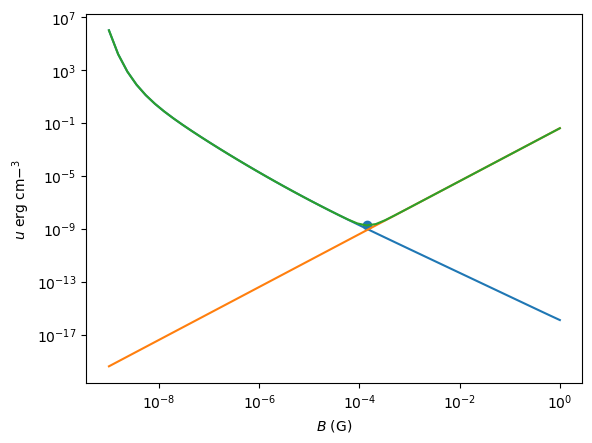

setting B to  0.0001389495494373139
setting N to  9.160733610838076e-06


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test_equipartition,R,region_size,cm,1.000000e+21,1.000000e+03,1.000000e+30,False,False
test_equipartition,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test_equipartition,B,magnetic_field,gauss,1.389495e-04,0.000000e+00,--,False,False
test_equipartition,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
test_equipartition,theta,jet-viewing-angle,deg,1.200000e+01,0.000000e+00,9.000000e+01,False,False
test_equipartition,BulkFactor,jet-bulk-factor,lorentz-factor*,3.500000e+00,1.000000e+00,1.000000e+05,False,False
test_equipartition,z_cosm,redshift,,6.510000e-01,0.000000e+00,--,False,False
test_equipartition,gmin,low-energy-cut-off,lorentz-factor*,5.000000e+01,1.000000e+00,1.000000e+09,False,False
test_equipartition,gmax,high-energy-cut-off,lorentz-factor*,3.000000e+06,1.000000e+00,1.000000e+15,False,False
test_equipartition,N,emitters_density,1 / cm3,9.160734e-06,0.000000e+00,--,False,False


In [30]:
my_jet.parameters.theta.val=12
B_min,b_grid,U_B,U_e=my_jet.set_B_eq(nuFnu_obs=5E-15,nu_obs=1E12,B_min=1E-9,N_pts=50,plot=True)
my_jet.show_pars()

my_jet.eval()


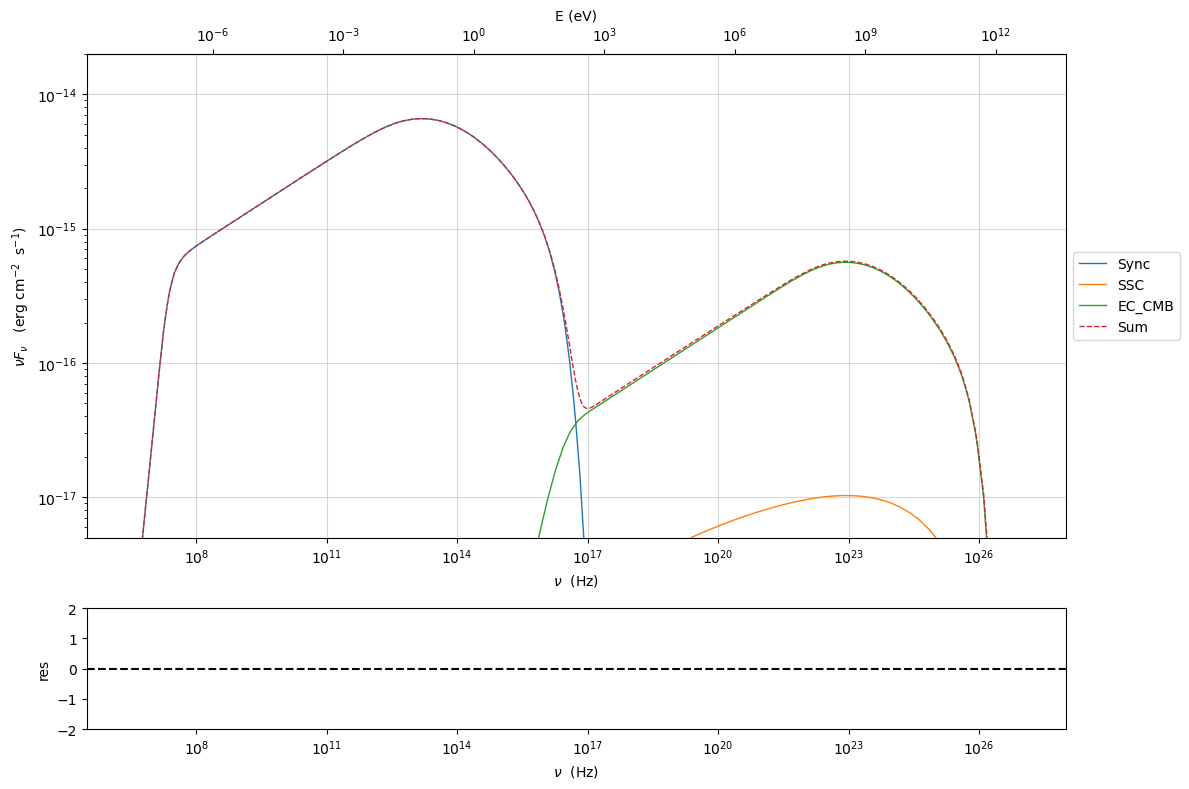

In [31]:
p=my_jet.plot_model()
p.setlim(y_min=5E-18,y_max=2E-14,x_max=1E28)